In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

In [8]:
row_1 = session.query(Measurement).first()
row_1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x226214cc610>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1}

In [9]:
for row in session.query(Measurement.id, Measurement.tobs).limit(10).all():
    print(row)

(1, 65.0)
(2, 63.0)
(3, 74.0)
(4, 76.0)
(5, 73.0)
(6, 70.0)
(7, 64.0)
(8, 68.0)
(9, 73.0)
(10, 64.0)


In [10]:
session.query(Measurement).count()

19550

In [11]:
row_1s = session.query(Station).first()
row_1s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x226214ee280>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

In [12]:
for row_s in session.query(Station.id, Station.station, Station.name).all():
    print(row_s)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US')
(2, 'USC00513117', 'KANEOHE 838.1, HI US')
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(4, 'USC00517948', 'PEARL CITY, HI US')
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US')
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US')
(7, 'USC00519281', 'WAIHEE 837.5, HI US')
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US')


In [13]:
session.query(Station).count()

9

In [14]:
engine.execute("select * from measurement limit 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [15]:
engine.execute("select * from station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
result1 = session.query(Measurement.id, Measurement.date).\
order_by(Measurement.date.desc()).limit(4).all()
result1

[(2724, '2017-08-23'),
 (7635, '2017-08-23'),
 (12187, '2017-08-23'),
 (19550, '2017-08-23')]

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
result2 = session.query(Measurement.id, Measurement.date, Measurement.prcp).\
order_by(Measurement.date.desc()).all()

In [18]:
len(result2)

19550

In [19]:
# Calculate the date one year from the last date in data set.
b=[]
for a in range(len(result2)):
    if result2[a][1] == '2016-08-23':
        b.append(a)
        print(a, result2[a][0], result2[a][1], result2[a][2])

2223 2364 2016-08-23 0.0
2224 5091 2016-08-23 0.15
2225 7331 2016-08-23 0.05
2226 8825 2016-08-23 None
2227 11851 2016-08-23 0.02
2228 14608 2016-08-23 1.79
2229 19202 2016-08-23 0.7


In [20]:
max(b)

2229

In [21]:
# Perform a query to retrieve the data and precipitation scores
last12M=session.query(Measurement.date, Measurement.prcp).\
order_by(Measurement.date.desc()).limit(max(b)+1).all() 
len(last12M)

2230

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last12M, columns=["M_date", "precipitation"])
df1 = df.dropna(how='any')
print(len(df))
print(len(df1))

2230
2021


In [23]:
df1.head()

,M_date,precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [24]:
df2b=df1.sort_values(by='M_date', ascending = True)
df2=df2b.reset_index()
df2

,index,M_date,precipitation
0,2229,2016-08-23,0.70
1,2223,2016-08-23,0.00
2,2224,2016-08-23,0.15
3,2228,2016-08-23,1.79
4,2227,2016-08-23,0.02
...,...,...,...
2016,4,2017-08-22,0.00
2017,3,2017-08-23,0.45
2018,2,2017-08-23,0.08
2019,1,2017-08-23,0.00


In [25]:
# Sort the dataframe by date
df1.set_index('M_date', inplace=True)
df3=df1.sort_index(ascending = True)
df3.head()

,precipitation
M_date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02


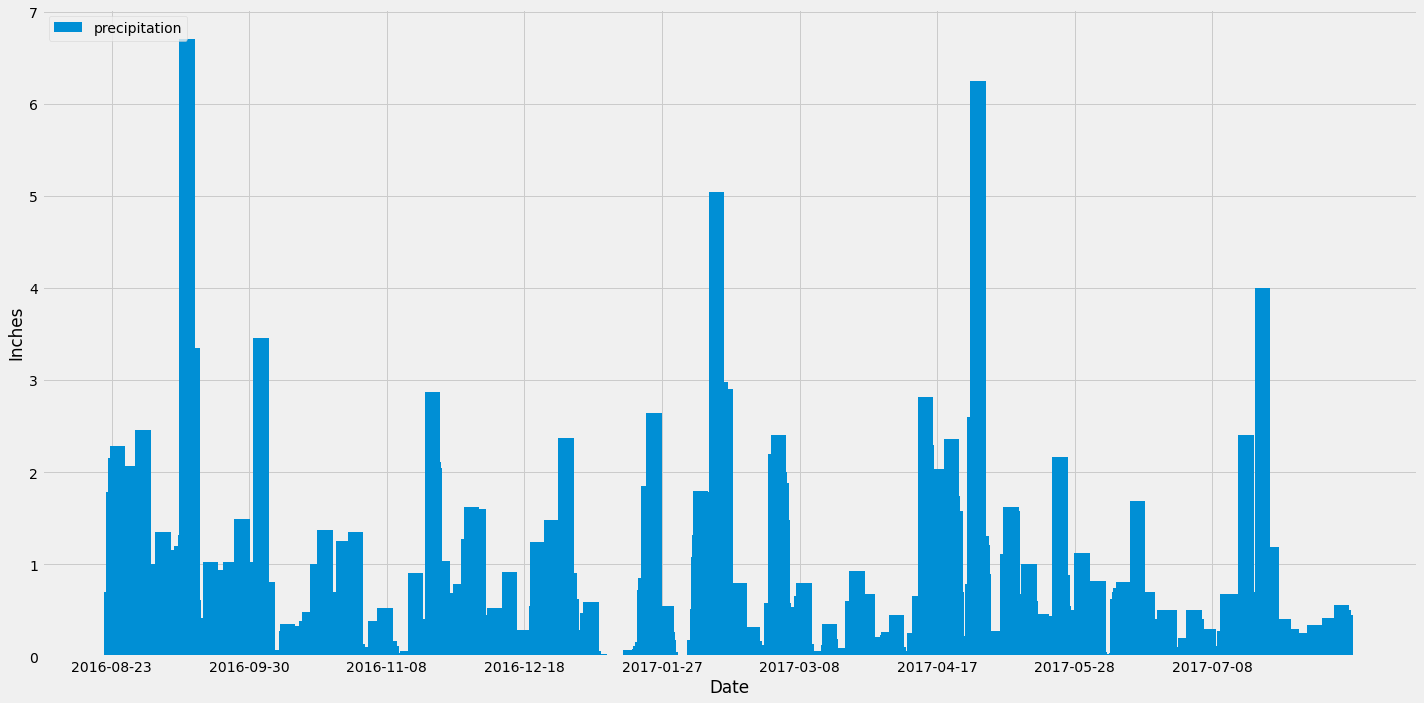

In [26]:
plt.figure(figsize = (20,10))
xpos = range(0, len(df3),1)
plt.bar(xpos, df3["precipitation"][xpos], width = 25)

xpos1 = range(0, len(df2), 225)
plt.xticks(np.arange(0, len(df2), step=225), (df2["M_date"][xpos1]))

plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(df3, loc=2)
plt.tight_layout()
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df3.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
stationo = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
stationo

[('USC00511918', '2010-01-01', 0.05, 66.0),
 ('USC00513117', '2010-01-01', 0.28, 67.0),
 ('USC00514830', '2010-03-01', 0.01, 67.0),
 ('USC00516128', '2010-01-01', 0.14, 73.0),
 ('USC00517948', '2010-05-03', None, 75.0),
 ('USC00518838', '2010-01-01', 0.21, 72.0),
 ('USC00519281', '2010-01-01', 0.15, 70.0),
 ('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519523', '2010-01-01', 0.15, 75.0)]

In [29]:
# Design a query to calculate the total number stations in the dataset
s1 = session.query(Station.station).all()
print(len(s1))
s1

9


[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [30]:
dfs = pd.DataFrame(s1, columns=["Station"])
print(len(dfs))
dfs

9


,Station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_a=[]
station_b=[]
for a in range(len(dfs)):
    station_a.append(session.query(Measurement.station).\
        filter(Measurement.station == dfs["Station"][a]).count())
    station_b.append(dfs["Station"][a])

In [32]:
station_c = pd.DataFrame({"Station" : station_b, 
                       "Counts" : station_a})
station_c = station_c.sort_values(by='Counts', ascending=False).reset_index()
station_c

,index,Station,Counts
0,6,USC00519281,2772
1,0,USC00519397,2724
2,1,USC00513117,2709
3,5,USC00519523,2669
4,8,USC00516128,2612
5,2,USC00514830,2202
6,7,USC00511918,1979
7,3,USC00517948,1372
8,4,USC00518838,511


In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Method 1 used
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs),
       func.count(Measurement.tobs)
      ]
sel_summary = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
sel_summary

[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Method 2
active_s = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').all()
dft = pd.DataFrame(active_s, columns=["Temperature"])
dft.describe()

,Temperature
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_t = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).all()
active_t

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [36]:
dftd = pd.DataFrame(active_t)
dftd

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
2767,2010-01-05,74.0
2768,2010-01-04,75.0
2769,2010-01-03,74.0
2770,2010-01-02,62.0


In [37]:
t=[]
for a in range(len(dftd)):
    if dftd["date"][a] == '2016-08-18':
        t.append(a)
        print(a, dftd["date"][a], dftd["tobs"][a])

356 2016-08-18 80.0


In [38]:
last12Mt=session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).limit(max(t)+1).all() 
len(last12Mt)

357

In [39]:
dftd12 = pd.DataFrame(last12Mt, columns=["S_date", "Temperature"])
dftd12m = dftd12.dropna(how='any')
print(len(dftd12))
print(len(dftd12m))
dftd12m

357
357


,S_date,Temperature
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
352,2016-08-22,78.0
353,2016-08-21,79.0
354,2016-08-20,81.0
355,2016-08-19,79.0


In [40]:
dftd12ms = dftd12m.sort_values(by='S_date', ascending=True).reset_index()
dftd12ms

,index,S_date,Temperature
0,356,2016-08-18,80.0
1,355,2016-08-19,79.0
2,354,2016-08-20,81.0
3,353,2016-08-21,79.0
4,352,2016-08-22,78.0
...,...,...,...
352,4,2017-08-14,77.0
353,3,2017-08-15,77.0
354,2,2017-08-16,76.0
355,1,2017-08-17,76.0


In [41]:
dftd12ms["Temperature"].describe()

count    357.000000
mean      73.196078
std        4.759460
min       59.000000
25%       70.000000
50%       74.000000
75%       77.000000
max       83.000000
Name: Temperature, dtype: float64

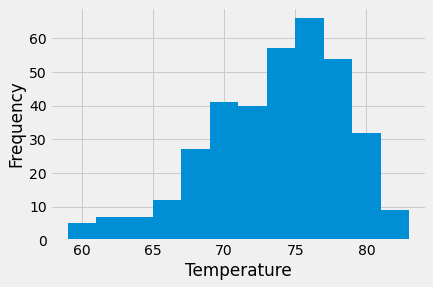

NormaltestResult(statistic=0.7914378504817233, pvalue=0.6731958877196171)


In [42]:
import scipy.stats as sts
plt.hist(dftd12ms["Temperature"], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
print(sts.normaltest(dftd12ms["Temperature"].sample(50)))

# Close session

In [43]:
# Close Session
session.close()